In [26]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import tensorflow as tf

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [27]:
tf.random.set_seed(42)
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation='relu')
hidden_layer2 = tf.keras.layers.Dense(30, activation='relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [28]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 2ms/step - loss: 1.0121 - root_mean_squared_error: 1.0060 - val_loss: 0.4737 - val_root_mean_squared_error: 0.6882
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4436 - root_mean_squared_error: 0.6660 - val_loss: 0.8391 - val_root_mean_squared_error: 0.9160
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3892 - root_mean_squared_error: 0.6238 - val_loss: 0.4338 - val_root_mean_squared_error: 0.6586
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3677 - root_mean_squared_error: 0.6064 - val_loss: 0.3450 - val_root_mean_squared_error: 0.5874
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3589 - root_mean_squared_error: 0.5991 - val_loss: 0.3465 - val_root_mean_squared_error: 0.5887
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3489 - root_mean_squared_error: 0.5906 - val_loss: 0.6773 - val_

In [29]:
mse_test, rmse_test = model.evaluate(X_test, y_test)
rmse_test

162/162 [==============================] - 0s 2ms/step - loss: 0.3086 - root_mean_squared_error: 0.5555


0.5555262565612793

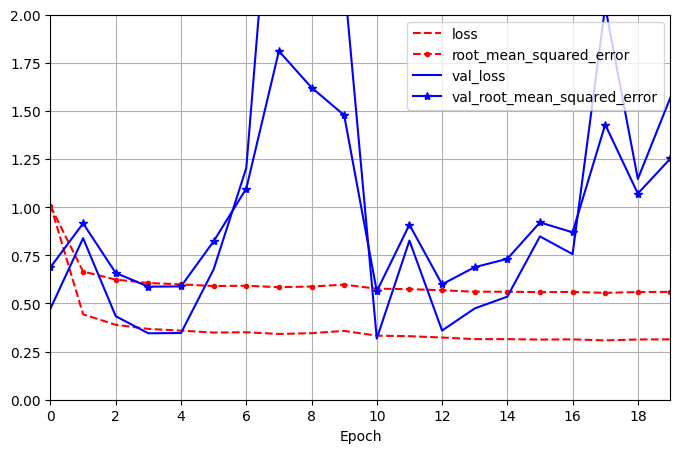

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 19], ylim=[0, 2], xticks=np.arange(0,21,2), grid=True, xlabel='Epoch', style=['r--', 'r--.', 'b-', 'b-*']
)
plt.show()

Two inputs

In [31]:
input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [32]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])

# pick columns for two inputs
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20, validation_data=((X_valid_wide, X_valid_deep), y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2756 - root_mean_squared_error: 1.1294 - val_loss: 1.0100 - val_root_mean_squared_error: 1.0050
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4839 - root_mean_squared_error: 0.6956 - val_loss: 0.4920 - val_root_mean_squared_error: 0.7014
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4317 - root_mean_squared_error: 0.6570 - val_loss: 0.4123 - val_root_mean_squared_error: 0.6421
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4055 - root_mean_squared_error: 0.6368 - val_loss: 0.4374 - val_root_mean_squared_error: 0.6613
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3908 - root_mean_squared_error: 0.6251 - val_loss: 0.3668 - val_root_mean_squared_error: 0.6056
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3793 - root_mean_squared_error: 0.6159 - val_loss: 0.6014 - val_

In [33]:
mse_test, rmse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
rmse_test

162/162 [==============================] - 0s 1ms/step - loss: 0.3439 - root_mean_squared_error: 0.5864


0.5864201784133911

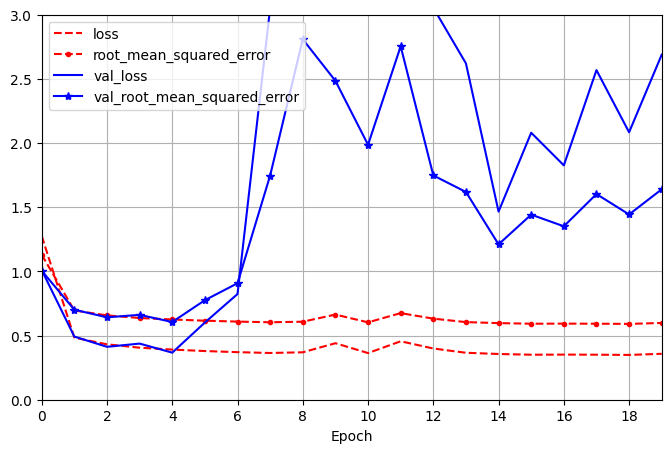

In [34]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 19], ylim=[0, 3], xticks=np.arange(0,21,2), grid=True, xlabel='Epoch', style=['r--', 'r--.', 'b-', 'b-*']
)
plt.show()